# Part I - Ford GoBike System Dataset Exploration
## by Zhiyu Wang

## Introduction
> The dataset describes information about 183,000 rides in the Ford GoBike System covering the greater San Francisco Bay area

## Preliminary Wrangling
- Load dataset
- convert time to dateTime and split into year, month, day, day of week, hour.
- convert columns to proper data type
- drop rows with missing value


In [101]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats  

%matplotlib inline


In [102]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


In [103]:
df.dropna(inplace = True)

In [104]:
#convert string to timestamp
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_month'] = df['start_time'].dt.month#start month
df['start_day'] = df['start_time'].dt.day#start day of month
df['start_day_of_week'] = df['start_time'].dt.day_name()#start day of week
df['start_hour'] = df['start_time'].dt.hour#start hour of day

df['end_month'] = df['end_time'].dt.month#end month
df['end_day'] = df['end_time'].dt.day#end day of month
df['end_day_of_week'] = df['end_time'].dt.day_name()#end day of week
df['end_hour'] = df['end_time'].dt.hour#end hour of day

In [105]:
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

In [106]:
df['age'] = 2019 - df['member_birth_year']

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [108]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,start_month,start_day,start_hour,end_month,end_day,end_hour,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,2.0,15.312337,13.456165,2.000080,15.311714,13.609533,34.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,0.0,8.033926,4.734282,0.008945,8.034127,4.748029,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,2.0,1.000000,0.000000,2.000000,1.000000,0.000000,18.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,2.0,8.000000,9.000000,2.000000,8.000000,9.000000,27.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,2.0,15.000000,14.000000,2.000000,15.000000,14.000000,32.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,2.0,22.000000,17.000000,2.000000,22.000000,18.000000,39.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,2.0,28.000000,23.000000,3.000000,28.000000,23.000000,141.000000


### What is the structure of your dataset?

> There are 174952 rows with valid values and 16 columns of data, with user behavior as well as user demographic information.

### What is/are the main feature(s) of interest in your dataset?

> It contains the start and end information of each trip ,as well as user's basic information.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> `duration_sec``start_time``end_time`: helpful to analyze time pattern of the trips
  `start_station_latitude``start_station_longitude``end_station_latitude``end_station_longitude`: helpful to analyze location pattern of the trips
  `user_type``member_birth_year``member_gender`: helpful to analyze user information

## Univariate Exploration

### Question: At which time spot(month, week, day of week, hour), there are most people using go-bike? i.e.Riding Frequency of each month/week/day of week/hour 

### Observation: 
* The dataset only contains trips starting in Feb
* The riding frequency decreases significantly at weekends
* Peaks occur around 8-9am and 16-18pm, which are the same as commute time.

In [109]:
print(df['start_month'].unique())
print(df['end_month'].unique())

[2]
[3 2]


In [110]:
df[df['end_month']==3].head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_month,start_day,start_day_of_week,start_hour,end_month,end_day,end_day_of_week,end_hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,2,28,Thursday,17,3,1,Friday,8,35.0


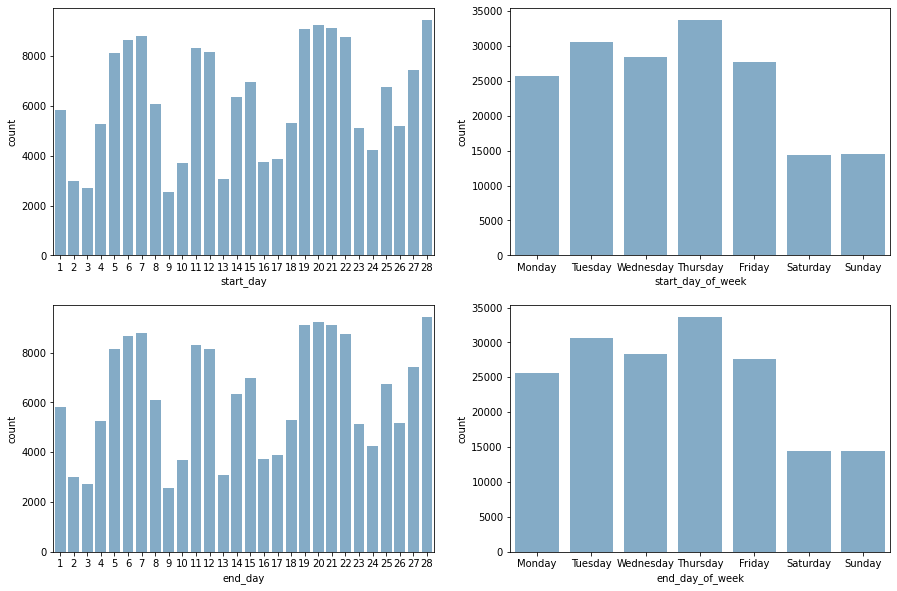

In [111]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [15, 10])

plt.subplot(2, 2, 1)
sb.countplot(data=df, x='start_day', color=base_color, alpha = 0.6);

plt.subplot(2, 2, 2)
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=df, x='start_day_of_week', color=sb.color_palette()[0], alpha = 0.6,order = day_order)


plt.subplot(2, 2, 3)
sb.countplot(data=df, x='end_day', color=base_color, alpha = 0.6);

plt.subplot(2, 2, 4)
sb.countplot(data=df, x='end_day_of_week', color=sb.color_palette()[0], alpha = 0.6,order = day_order);


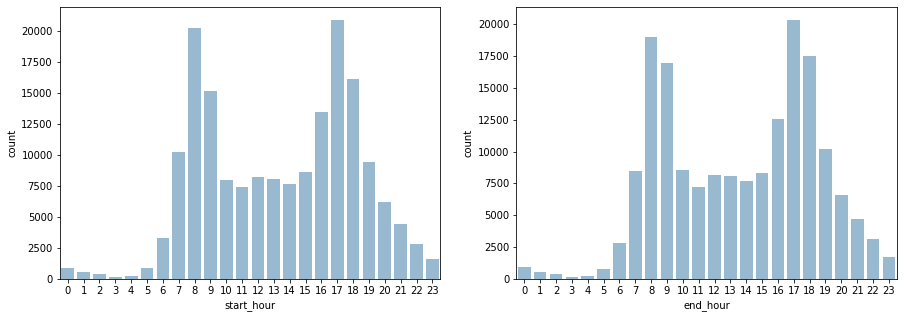

In [112]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sb.countplot(data=df, x='start_hour', color=base_color, alpha = 0.5);

plt.subplot(1, 2, 2)
sb.countplot(data=df, x='end_hour', color=base_color, alpha = 0.5);

### Question: Stations with most Traffic

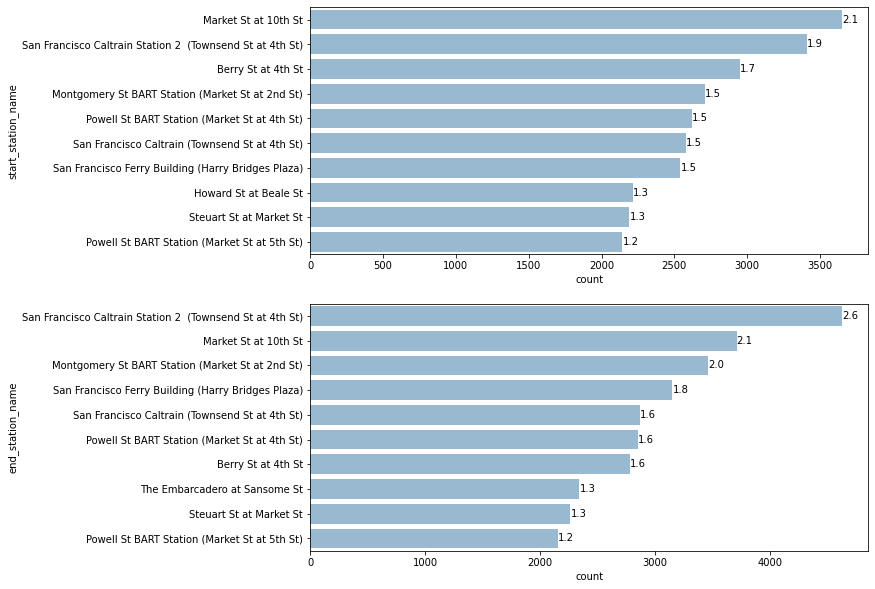

In [113]:
plt.figure(figsize = [10,10])

plt.subplot(2,1, 1)
# Plot the Pokemon type on a Horizontal bar chart
type_order = df['start_station_name'].value_counts().head(10).index
sb.countplot(data=df, y='start_station_name', color=base_color, order=type_order,alpha = 0.5);

# print the proportion text on the bars
type_counts = df['start_station_name'].value_counts()
counts = df['start_station_name'].value_counts().sum()
for i in range (10):
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/counts)
    plt.text(count+1, i, pct_string, va='center')

plt.subplot(2,1,2)
# Plot the Pokemon type on a Horizontal bar chart
type_order = df['end_station_name'].value_counts().head(10).index
sb.countplot(data=df, y='end_station_name', color=base_color, order=type_order,alpha = 0.5);

# print the proportion text on the bars
type_counts2 = df['end_station_name'].value_counts()
counts2 = df['end_station_name'].value_counts().sum()
for i in range (10):
    count = type_counts2[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/counts2)
    plt.text(count+1, i, pct_string, va='center')
    

### Question: What's the distribution of duration of each trip?

# Observation: 
* The distribution is skewed right. 
* The plot has a long tail. When transforming into a log scale, the plot may fit a normal distribution, with a peak between 5-20 minutes.

In [114]:
df['duration_min'] = df['duration_sec']/60

In [115]:
df['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

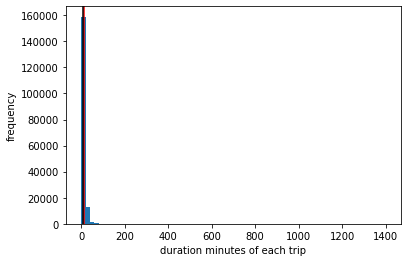

In [116]:
bins = np.arange(0, 1409, 20)
plt.hist(df['duration_min'],bins = bins)

plt.axvline(np.mean(df['duration_min']), color = 'r')
plt.axvline(np.median(df['duration_min']), color = 'black')
plt.xlabel('duration minutes of each trip')
plt.ylabel('frequency');

In [117]:
high_outliers = (df['duration_min'] > 60)
print(high_outliers.sum()/df['duration_min'].sum())#proportion of outlier

0.0006751825623499757


In [118]:
df = df.loc[-high_outliers] # drop outliers

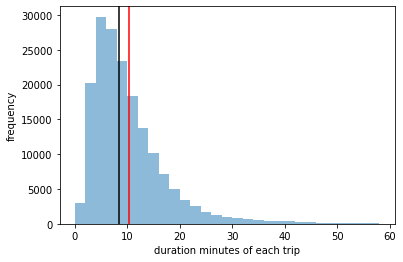

In [119]:
bins = np.arange(0, 60, 2)
plt.hist(df['duration_min'],bins = bins,alpha = 0.5)

plt.axvline(np.mean(df['duration_min']), color = 'r')
plt.axvline(np.median(df['duration_min']), color = 'black')
plt.xlabel('duration minutes of each trip')
plt.ylabel('frequency');

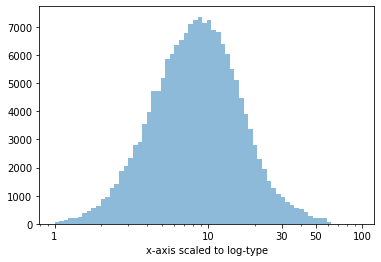

In [120]:
## there's a long tail in the distribution, so let's put it on a log scale
bins = 10 ** np.arange(0, 2, 0.03)
plt.hist(data=df, x='duration_min', bins=bins,alpha = 0.5);

plt.xscale('log')# Axis transformation
plt.xticks([1,10,30,50,100], [1,10,30,50,100])
plt.xlabel('x-axis scaled to log-type');

### Question: Basic information of users

### Observation:
* 75% of the users are male.
* The distribution of age has a long tail and skew left. There's a peak between 25 and 35 after applying a log transformation.
* This analysis doesn't take repetitive users into consideration due to lack of information on user id.

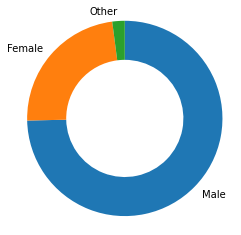

In [121]:
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

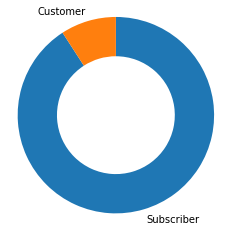

In [122]:
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

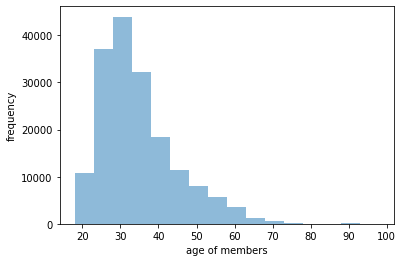

In [123]:
bins = np.arange(18, 100, 5)
plt.hist(df['age'],bins = bins,alpha = 0.5)
plt.xlabel('age of members')
plt.ylabel('frequency');

In [124]:
age_outliers = (df['age'] > 70)#outlier
print(age_outliers.sum()/df['age'].sum())#proportion of outlier

9.63855259271167e-05


In [125]:
df = df.loc[-age_outliers] # drop outliers

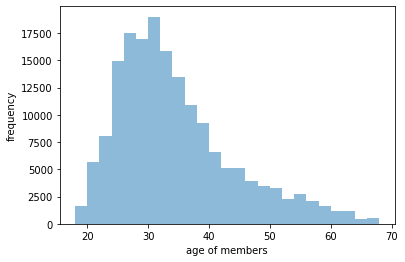

In [126]:
bins = np.arange(18, 70, 2)
plt.hist(df['age'],bins = bins,alpha = 0.5)

plt.xlabel('age of members')
plt.ylabel('frequency');

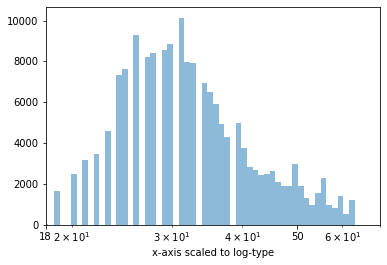

In [127]:
## there's a long tail in the distribution, so let's put it on a log scale
bins = 10 ** np.arange(1.2, 1.8, 0.01)
plt.hist(data=df, x='age', bins=bins,alpha = 0.5);

plt.xscale('log')# Axis transformation
plt.xticks([18,50], [18,50])
plt.xlim(18,70)
plt.xlabel('x-axis scaled to log-type');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In the `Duration_min` column, there are outliers that a trip lasts more than 60 minutes, with less than 0.9% of the population. So I drop those outliers.
> In the `Member birth year` column, there are extreme data points that users are born between 1878 and 1950, which may not be very common. I drop those outliers because those data points don't take over much proportion.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. `Duration_min` and `Age` columns: The orginal plots are skewed right with a long tail. After applying log transformation, the plot can fit a normal distribution.
2. Stations with most traffic: 
<br>San Francisco Caltrain Station 2  (Townsend St at 4th St)
<br>Market St at 10th St
<br>Montgomery St BART Station (Market St at 2nd St)
<br>San Francisco Ferry Building (Harry Bridges Plaza)
<br>San Francisco Caltrain (Townsend St at 4th St)

## Bivariate Exploration


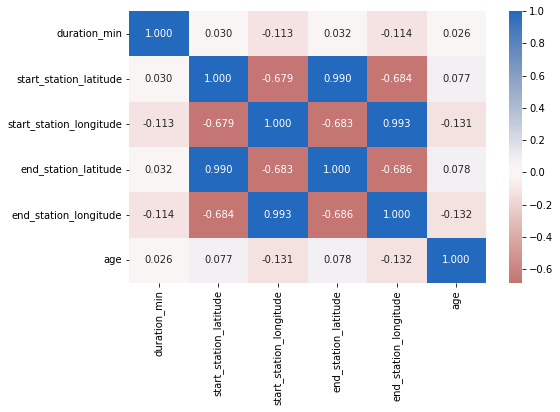

In [128]:
# correlation plot
numeric_vars = ['duration_min','start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'age']
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [129]:
df.reset_index(inplace = True)

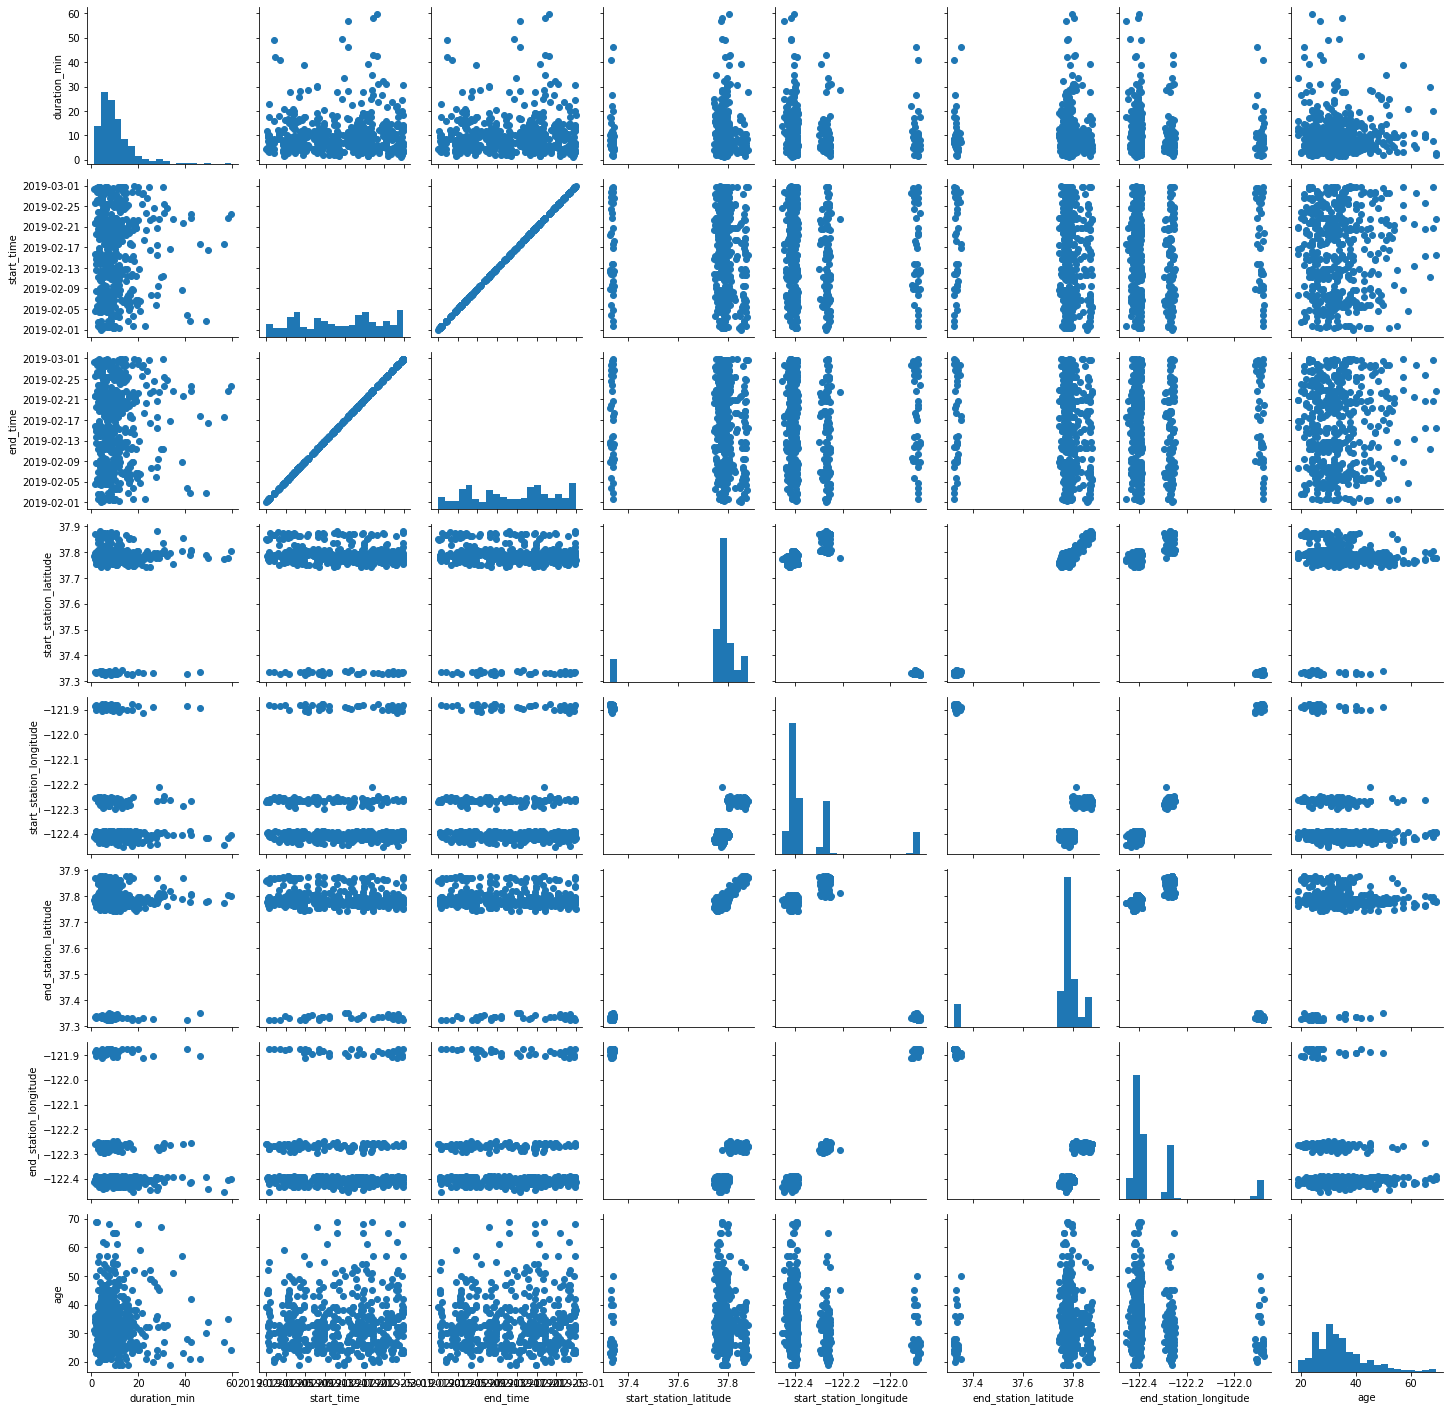

In [138]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

### Question: Duration related to Different Time Slot (Day of week, Hour of day)
### Observation:
* At weekends, trips take longer time compared with those on the weekdays.
* There are two peaks in the Start Hour-Duration heat map, one between 8-10 am and the other between 16-18pm. The duration of both peaks are 5-10 minutes. It indicates that the most users choose to use sharing bikes to commute, with a 5-10-minute travel distance.

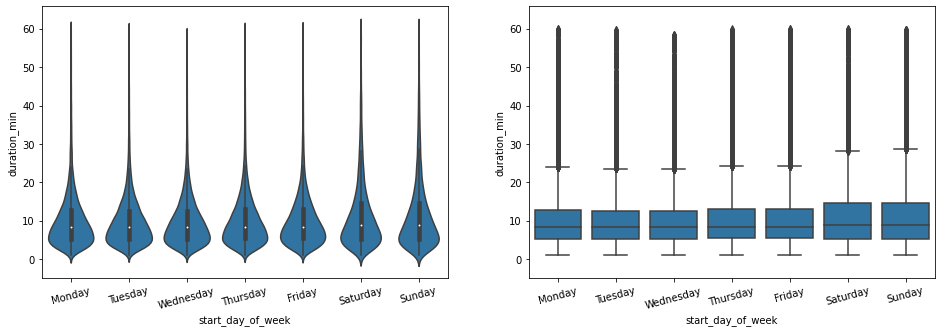

In [131]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=df, x='start_day_of_week', y='duration_min', color=base_color,order = day_order)
plt.xticks(rotation=15);

# box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='start_day_of_week', y='duration_min', color=base_color,order = day_order)
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim()); 

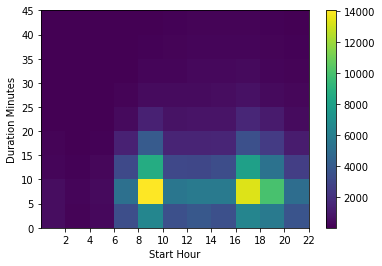

In [142]:
bins_x = np.arange(0,24,2)
bins_y = np.arange(0,50,5)
plt.hist2d(data = df, x = 'start_hour', y = 'duration_min',cmin=0.5, bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Start Hour')
plt.ylabel('Duration Minutes')
plt.xticks(np.arange(2, 24, 2));

### Question: Impact on User Behavior by Different User Types
- User Type vs. Duration
- User Type vs. Sharing
- User Type vs. Day of Week
### Observation:
- User Type vs. Duration: Subscaibers have shorter trips on average, but more outliers.
- User Type vs. Sharing: bike sharing is only available to subscribers.
- User Type vs. Day of Week: On weekdays, the user type doesn't affect the daily traffic of goBike. At weekends, the daily frequency of customers doesn't change a lot, while that of subscribers drops a lot.

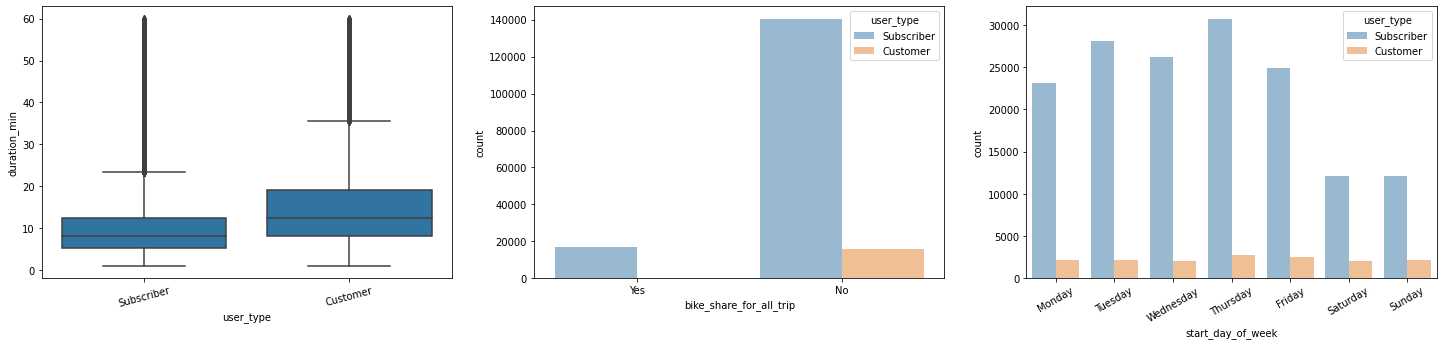

In [133]:
plt.figure(figsize = [25,5])

plt.subplot(1,3, 1)
sb.boxplot(data=df, x='user_type', y='duration_min', color=base_color)
plt.xticks(rotation=15)

plt.subplot(1,3, 2)
sb.countplot(data = df, x = 'bike_share_for_all_trip', hue = 'user_type',alpha = 0.5);

plt.subplot(1,3, 3)
sb.countplot(data = df, x = 'start_day_of_week', hue = 'user_type',order = day_order,alpha = 0.5)
plt.xticks(rotation=30);

### Question:  Impact on User Behavior by Different User Ages
- Age vs. Duration
### Observation:
- 24-33 year-old users are the main group of the users. They mostly take 5-10 minutes trips. And this is the only peak of the heat map.

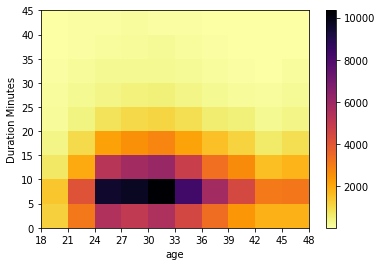

In [134]:
bins_x = np.arange(18,50,3)
bins_y = np.arange(0,50,5)
plt.hist2d(data = df, x = 'age', y = 'duration_min',cmin=0.5,bins = [bins_x, bins_y], cmap='inferno_r')
plt.colorbar()
plt.xlabel('age')
plt.ylabel('Duration Minutes')
plt.xticks(np.arange(18,50,3));

### Question: Impact on User Type by Different User Ages
### Observation: No specific relationship


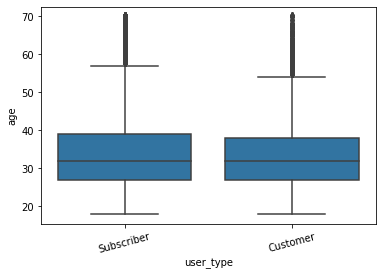

In [144]:
sb.boxplot(data=df, x='user_type', y='age', color=base_color)
plt.xticks(rotation=15);

### Question: Location Heat Map
### Observation: 
- The scatter map shows the 2 areas that have most of the traffic.

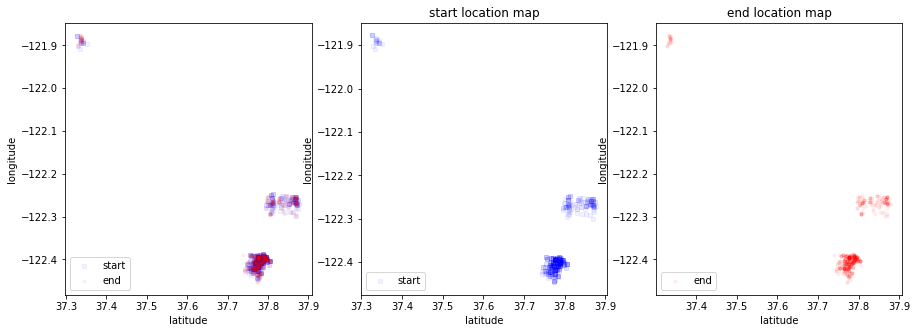

In [135]:
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

plt.figure(figsize = [15,5])

plt.subplot(1,3, 1)
plt.scatter(df_samp['start_station_latitude'], df_samp['start_station_longitude'], s=10, c='b', marker="s", label='start',alpha = 0.05)
plt.scatter(df_samp['end_station_latitude'],df_samp['end_station_longitude'], s=10, c='r', marker="o", label='end',alpha = 0.05)
plt.legend(loc='lower left')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.subplot(1,3, 2)
plt.scatter(df_samp['start_station_latitude'], df_samp['start_station_longitude'], s=10, c='b', marker="s", label='start',alpha = 0.05)
plt.legend(loc='lower left')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('start location map')

plt.subplot(1,3, 3)
plt.scatter(df_samp['end_station_latitude'],df_samp['end_station_longitude'], s=10, c='r', marker="o", label='end',alpha = 0.05)
plt.legend(loc='lower left')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('end location map')


plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The user type can affect the duration and frequency of each trip. Subscribers usually travel on weekdays, and each trip takes 5-10 minutes mostly. Since that 90% of the users are subscribers, we can conclude that they subscribe for the purpose of commute. And the day of week doesn't affect the frequncy of regular customers. We can deduce that they use the service for a random purpose.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> With the latitude and longitude scatter plots, we can discover 2 main areas of starting and ending stations.

## Multivariate Exploration

### Problem: 
- Duration vs. Day of week of different user type
### Observation:
- The durations of subscribers among the week don't change a lot on average.
- The durations of subscribers at weekends are higher.


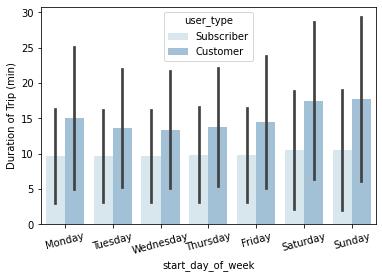

In [155]:
sb.barplot(data=df, x='start_day_of_week', y='duration_min',hue = 'user_type', palette = 'Blues', ci='sd',alpha = 0.5,order = day_order)
plt.xticks(rotation=15);
plt.ylabel('Duration of Trip (min)');

### Problem: 
- Duration vs. age of different user type
### Observation:
- The age and duration of subscribers are intensely distributed in the lower left of the plot: 20-35 year old, 3-15 minutes.
- The age and duration of subscribers are sparsely distributed.

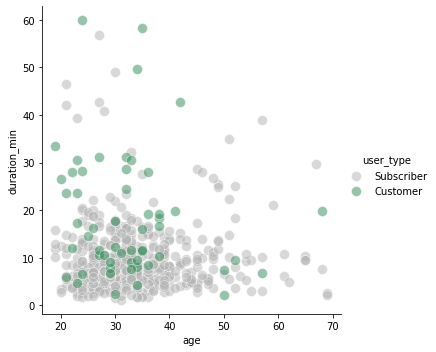

In [154]:
pal = dict(Customer="seagreen", Subscriber=".7")
g = sb.FacetGrid(df_samp, hue="user_type", palette=pal, height=5)
g.map(sb.scatterplot, "age", "duration_min", s=100, alpha=0.5);
g.add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I explored the relationship between duration and day of week  with split user segementation: 
> * The durations of subscribers among the week don't change a lot on average.
> * The durations of subscribers at weekends are a little bit higher compared with those on weekdays.


## Conclusions
### Univariate Exploration:
1. The dataset only contains trips starting in Feb.
2. The riding frequency decreases significantly at weekends -------**I'll put this into final presentation.**
3. Peaks occur around 8-9am and 16-18pm, which are the same as commute time.-------**I'll put this into final presentation.**
4. The distribution of duration has a long tail. When transforming into a log scale, the plot may fit a normal distribution, with a peak between 5-20 minutes.
5. 75% of the users are male.
6. The distribution of age has a long tail and skew left. There's a peak between 25 and 35 after applying a log transformation.
7. At weekends, trips take longer time compared with those on the weekdays.
### Bivariate Exploration:
8. There are two peaks in the Start Hour-Duration heat map, one between 8-10 am and the other between 16-18pm. The duration of both peaks are 5-10 minutes. It indicates that the most users choose to use sharing bikes to commute, with a 5-10-minute travel distance.-------**I'll put this into final presentation.**
9.User Type vs. Duration: Subscaibers have shorter trips on average, but more outliers.
10. User Type vs. Sharing: bike sharing is only available to subscribers.
11. User Type vs. Day of Week: On weekdays, the user type doesn't affect the daily traffic of goBike. At weekends, the daily frequency of customers doesn't change a lot, while that of subscribers drops a lot.
12. 24-33 year-old users are the main group of the users. They mostly take 5-10 minutes trips. And this is the only peak of the heat map.
### Multivariate Exploration:
13. The durations of subscribers among the week don't change a lot on average. The durations of subscribers at weekends are higher.-------**I'll put this into final presentation.**
14. The age and duration of subscribers are intensely distributed in the lower left of the plot: 20-35 year old, 3-15 minutes. The age and duration of subscribers are sparsely distributed.
